In [1]:
!pip install pandas matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


# Cloud vs Edge - Simultaneous Testing [1 second Ramp Up Period]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
# Assuming the files are named in a consistent way like '100NCR.csv', '200NCR.csv', etc.
ncr_values = [100, 200, 300, 400, 500, 600, 700]
data = []

for ncr in ncr_values:
    filename = f'Simultaneous_1sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    data.append(df)



FileNotFoundError: [Errno 2] No such file or directory: 'Simultaneous_1sRUP/100NCR.csv'

In [7]:
data

[                           Label  # Samples  Average  Min  Max  Std. Dev.  \
 0  Edge Device - Asus ROG Laptop        100       14   10   41       3.98   
 1              Azure Web Service        100       47   31  194      24.59   
 2                          TOTAL        200       31   10  194      24.19   
 
   Error %  Throughput  Received KB/sec  Sent KB/sec  Avg. Bytes  NCR  
 0  0.000%    99.40358            13.69        41.74       141.0  100  
 1  0.000%    98.42520           138.70        59.59      1443.0  100  
 2  0.000%   192.49278           148.88        98.69       792.0  100  ,
                            Label  # Samples  Average  Min   Max  Std. Dev.  \
 0  Edge Device - Asus ROG Laptop        200       24   11   105      18.25   
 1              Azure Web Service        200     1072  200  1626     336.33   
 2                          TOTAL        400      548   11  1626     575.90   
 
   Error %  Throughput  Received KB/sec  Sent KB/sec  Avg. Bytes  NCR  
 0  0.0

In [8]:
# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)
df

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes,NCR
0,Edge Device - Asus ROG Laptop,100,14,10,41,3.98,0.000%,99.40358,13.69,41.74,141.0,100
1,Azure Web Service,100,47,31,194,24.59,0.000%,98.42520,138.70,59.59,1443.0,100
2,TOTAL,200,31,10,194,24.19,0.000%,192.49278,148.88,98.69,792.0,100
3,Edge Device - Asus ROG Laptop,200,24,11,105,18.25,0.000%,197.23866,27.16,82.82,141.0,200
4,Azure Web Service,200,1072,200,1626,336.33,0.000%,102.51153,144.46,62.07,1443.0,200
5,TOTAL,400,548,11,1626,575.90,0.000%,202.32676,156.49,103.73,792.0,200
6,Edge Device - Asus ROG Laptop,300,68,14,139,25.45,0.000%,304.87805,41.98,128.02,141.0,300
7,Azure Web Service,300,253,53,638,127.63,0.000%,201.88425,284.49,122.23,1443.0,300
8,TOTAL,600,161,14,638,130.82,0.000%,396.56312,306.72,203.32,792.0,300
9,Edge Device - Asus ROG Laptop,400,82,26,144,20.19,0.000%,313.72549,43.20,131.74,141.0,400


In [9]:
# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Set the plotting style
sns.set(style="whitegrid")

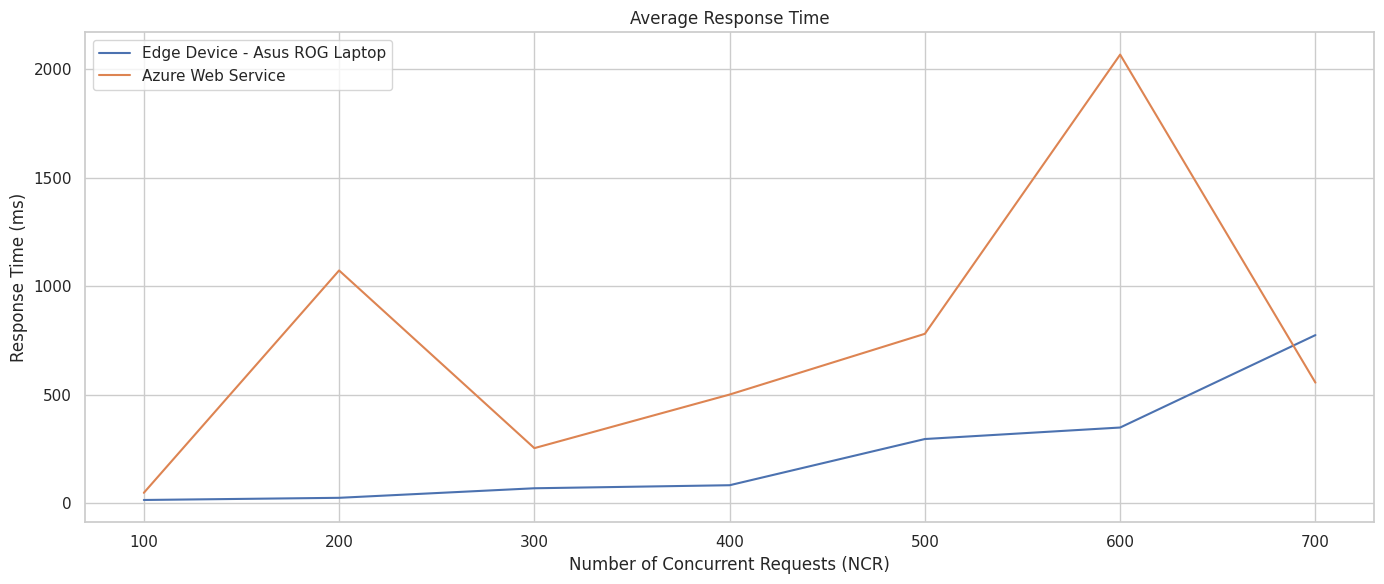

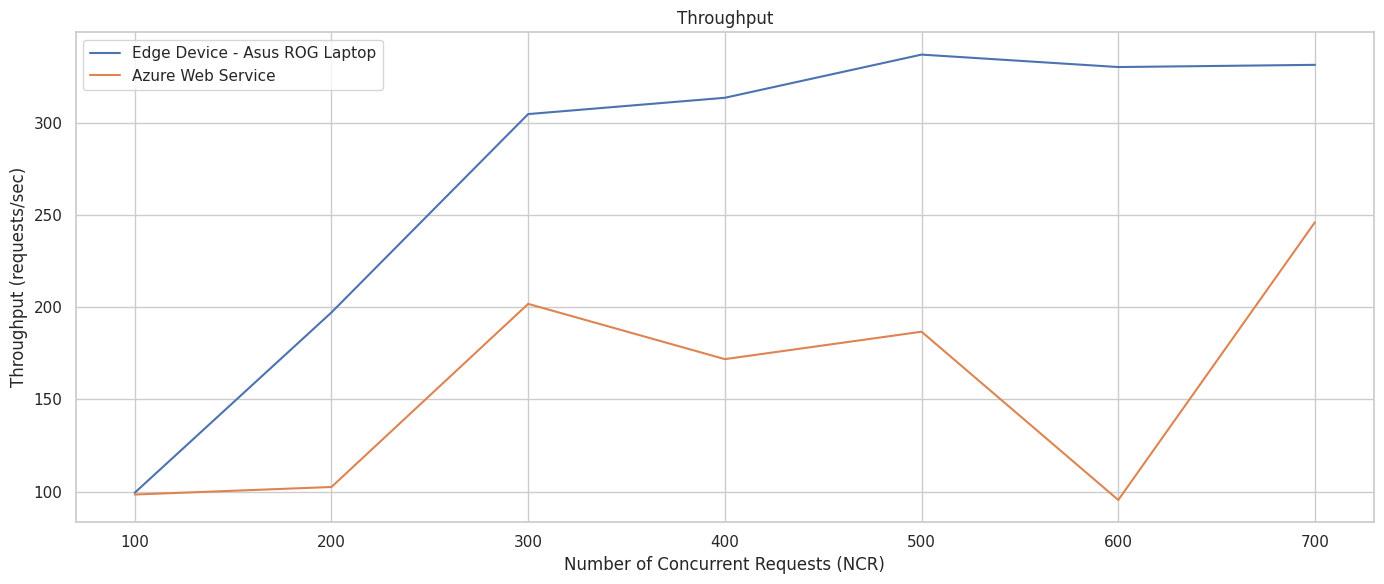

In [10]:
# Plot Average Response Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='NCR', y='Average', hue='Label', data=df)
plt.title('Average Response Time')
plt.ylabel('Response Time (ms)')
plt.xlabel('Number of Concurrent Requests (NCR)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot Throughput
plt.figure(figsize=(14, 6))
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df)
plt.title('Throughput')
plt.ylabel('Throughput (requests/sec)')
plt.xlabel('Number of Concurrent Requests (NCR)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Cloud vs Edge - Simultaneous Testing [5 second Ramp Up Period]

In [12]:
# Load the data from CSV files
# Assuming the files are named in a consistent way like '100NCR.csv', '200NCR.csv', etc.
ncr_values = [100, 200, 300, 400, 500, 1000, 1500, 2000]
data = []

for ncr in ncr_values:
    filename = f'Simultaneous_5sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    data.append(df)

In [13]:
data

[                           Label  # Samples  Average  Min  Max  Std. Dev.  \
 0  Edge Device - Asus ROG Laptop        100       63   16  328      54.83   
 1              Azure Web Service        100       44   33  107      11.68   
 2                          TOTAL        200       53   16  328      40.82   
 
   Error %  Throughput  Received KB/sec  Sent KB/sec  Avg. Bytes  NCR  
 0  0.000%    19.92826             2.74         8.37       141.0  100  
 1  0.000%    19.88467            28.02        12.04      1443.0  100  
 2  0.000%    39.57262            30.61        20.29       792.0  100  ,
                            Label  # Samples  Average  Min  Max  Std. Dev.  \
 0  Edge Device - Asus ROG Laptop        200       30   13  167      25.29   
 1              Azure Web Service        200       45   30  103      15.42   
 2                          TOTAL        400       38   13  167      22.12   
 
   Error %  Throughput  Received KB/sec  Sent KB/sec  Avg. Bytes  NCR  
 0  0.000% 

In [14]:
# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)
df



,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes,NCR
0,Edge Device - Asus ROG Laptop,100,63,16,328,54.83,0.000%,19.92826,2.74,8.37,141.0,100
1,Azure Web Service,100,44,33,107,11.68,0.000%,19.88467,28.02,12.04,1443.0,100
2,TOTAL,200,53,16,328,40.82,0.000%,39.57262,30.61,20.29,792.0,100
3,Edge Device - Asus ROG Laptop,200,30,13,167,25.29,0.000%,39.94408,5.50,16.77,141.0,200
4,Azure Web Service,200,45,30,103,15.42,0.000%,40.83299,57.54,24.72,1443.0,200
5,TOTAL,400,38,13,167,22.12,0.000%,79.36508,61.38,40.69,792.0,200
6,Edge Device - Asus ROG Laptop,300,17,11,59,8.08,0.000%,58.35441,8.04,24.50,141.0,300
7,Azure Web Service,300,45,29,231,28.23,0.000%,58.10575,81.88,35.18,1443.0,300
8,TOTAL,600,31,11,231,25.09,0.000%,115.78541,89.55,59.36,792.0,300
9,Edge Device - Asus ROG Laptop,400,32,11,297,46.48,0.000%,75.50019,10.40,31.70,141.0,400


In [15]:
# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Set the plotting style
sns.set(style="whitegrid")

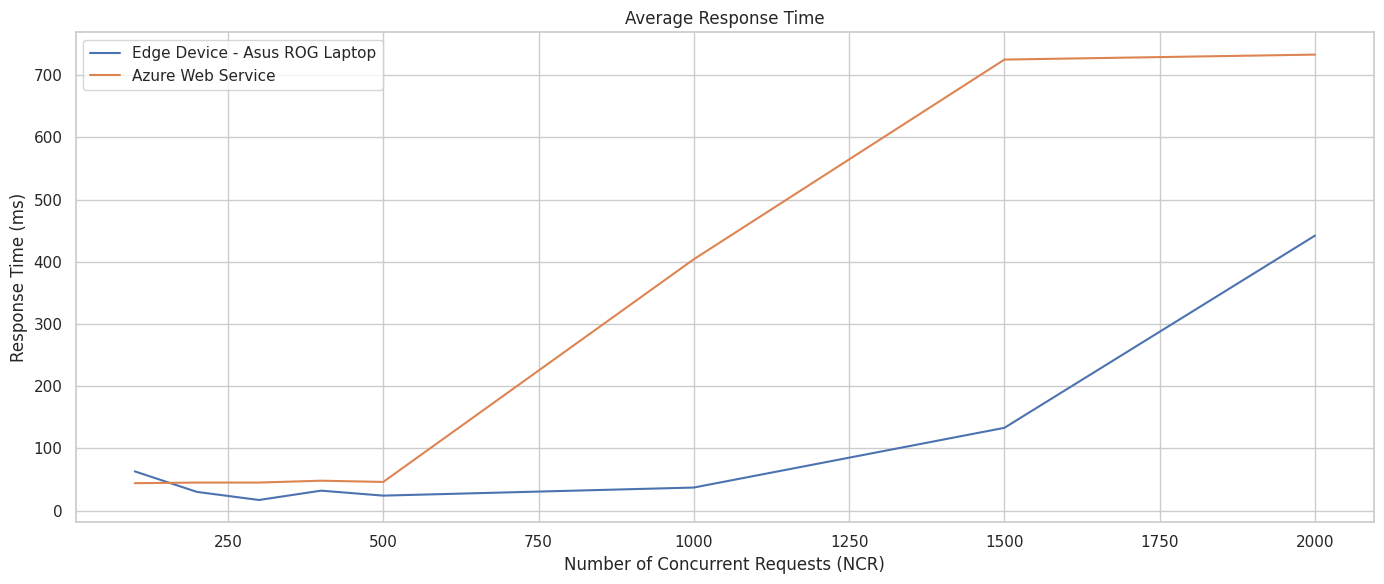

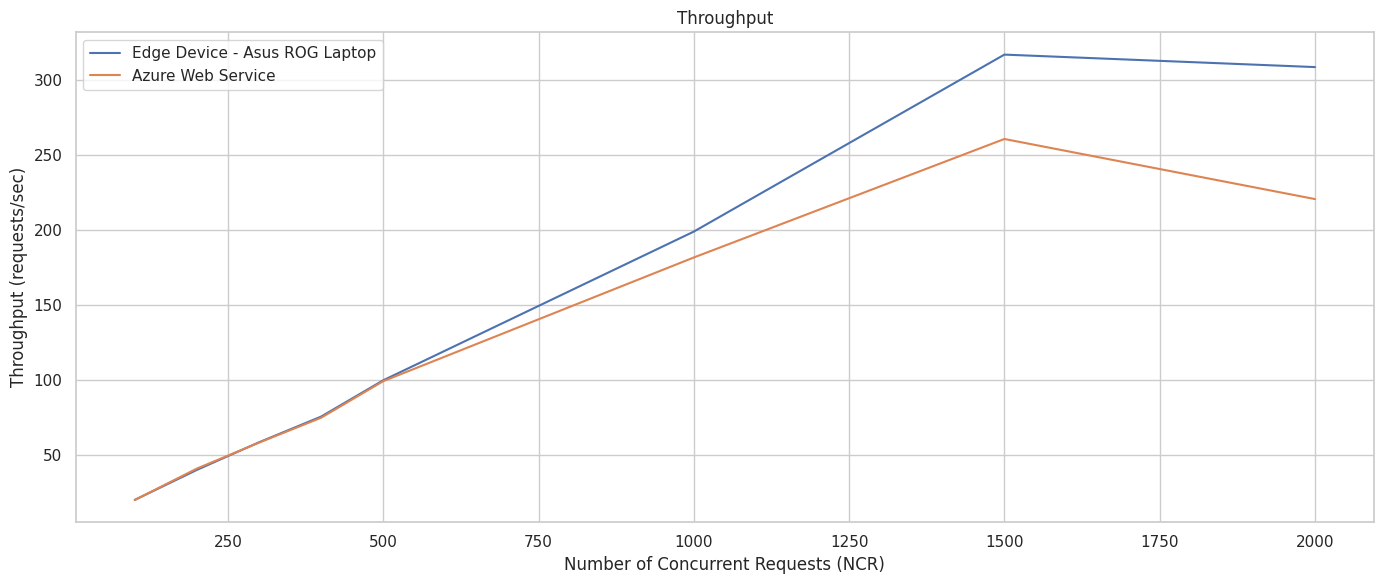

In [16]:
# Plot Average Response Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='NCR', y='Average', hue='Label', data=df)
plt.title('Average Response Time')
plt.ylabel('Response Time (ms)')
plt.xlabel('Number of Concurrent Requests (NCR)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot Throughput
plt.figure(figsize=(14, 6))
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df)
plt.title('Throughput')
plt.ylabel('Throughput (requests/sec)')
plt.xlabel('Number of Concurrent Requests (NCR)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Final - Edge 1 vs Edge 2 - Simultaneous Testing [1 second Ramp Up Period]

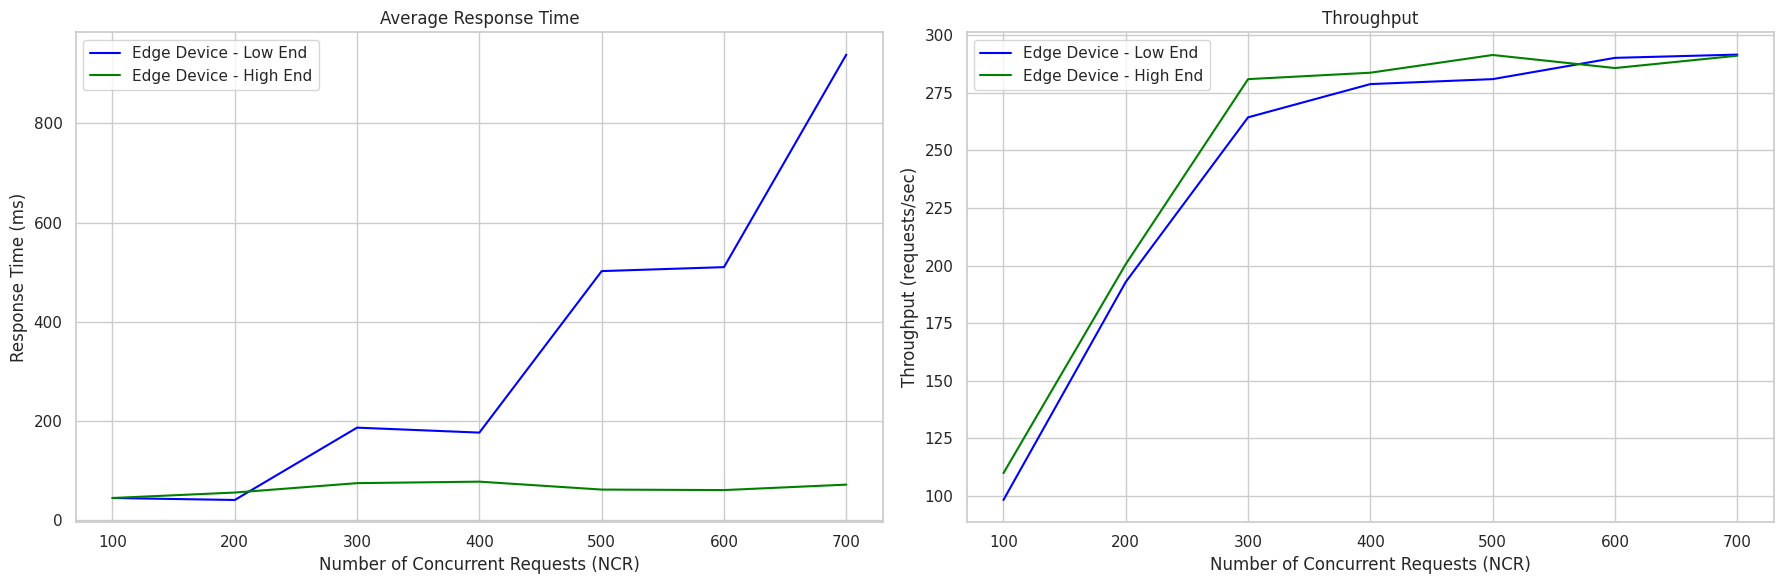

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
# Assuming the files are named in a consistent way like '100NCR.csv', '200NCR.csv', etc.
ncr_values = [100, 200, 300, 400, 500, 600, 700]
data = []

for ncr in ncr_values:
    filename = f'Simultaneous_1sRUP_Alienware/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    data.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names if necessary
df['Label'] = df['Label'].replace({
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End',
    'Edge Device - Alienware Laptop': 'Edge Device - High End'
})

# Set the plotting style
sns.set(style="whitegrid")

# Define custom color palette
palette = {"Edge Device - High End": "green", "Edge Device - Low End": "blue"}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Average Response Time
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0])
axes[0].set_title('Average Response Time')
axes[0].set_ylabel('Response Time (ms)')
axes[0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0].legend(loc='upper left', title='')

# Plot Throughput
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[1])
axes[1].set_title('Throughput')
axes[1].set_ylabel('Throughput (requests/sec)')
axes[1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1].legend(loc='upper left', title='')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('E1VsE2.png', format='png')


# Final - Cloud vs Edge - Isolated Testing [1 second Ramp Up Period]

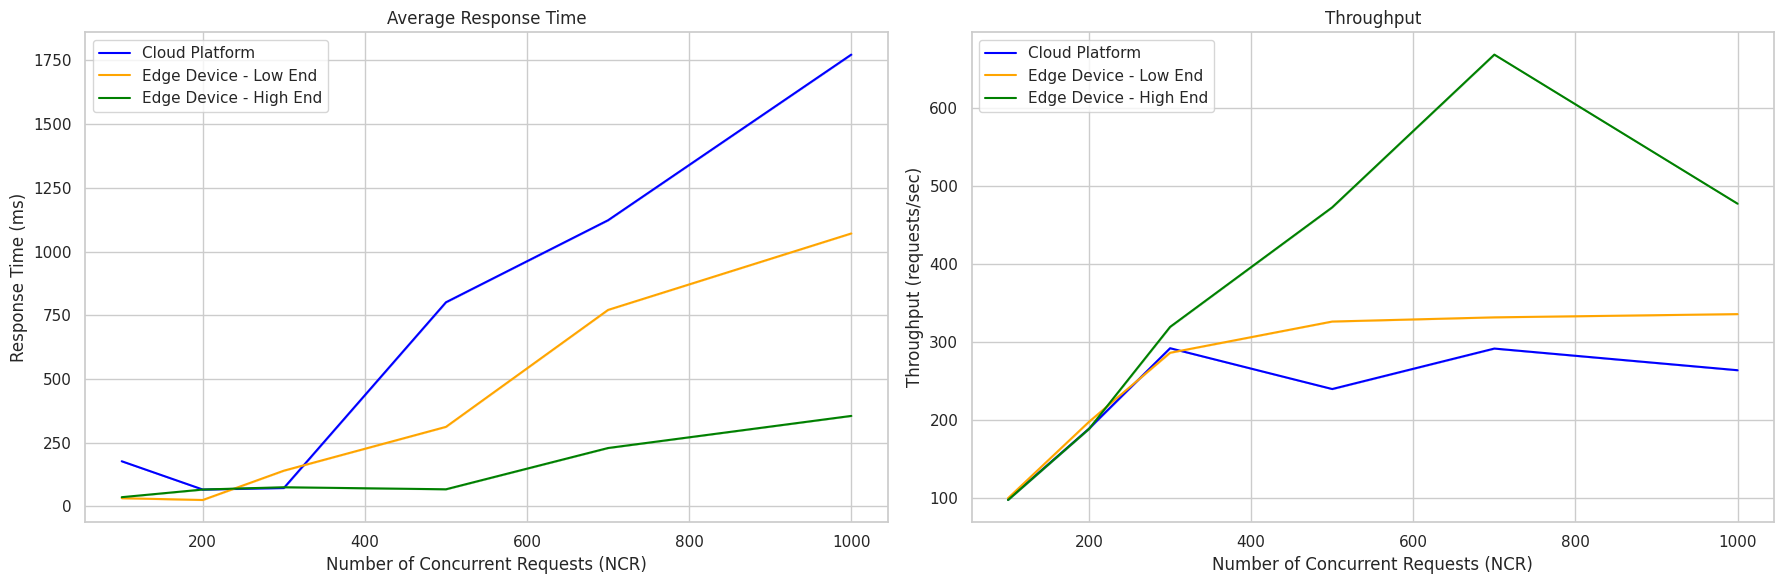

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing the CSV files
directory = 'Isolated_1sRUP/'  # Adjust this path as necessary

# Load the data from CSV files
ncr_values = [100, 200, 300, 500, 700, 1000]
data = []

for ncr in ncr_values:
    azure_filename = os.path.join(directory, f'Azure{ncr}NCR.csv')
    edge_asus_filename = os.path.join(directory, f'Edge{ncr}NCR.csv')
    edge_alienware_filename = os.path.join(directory, f'Alienware{ncr}NCR.csv')
    
    # Load Azure data
    azure_df = pd.read_csv(azure_filename)
    azure_df['NCR'] = ncr  # Add a column to indicate the NCR value
    azure_df['Label'] = 'Cloud Platform'  # Add a column to indicate the source
    data.append(azure_df)
    
    # Load Edge data (Asus ROG Laptop)
    edge_asus_df = pd.read_csv(edge_asus_filename)
    edge_asus_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_asus_df['Label'] = 'Edge Device - Low End'  # Add a column to indicate the source
    data.append(edge_asus_df)
    
    # Load Edge data (Alienware Laptop)
    edge_alienware_df = pd.read_csv(edge_alienware_filename)
    edge_alienware_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_alienware_df['Label'] = 'Edge Device - High End'  # Add a column to indicate the source
    data.append(edge_alienware_df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Set the plotting style
sns.set(style="whitegrid")

# Define custom color palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "orange", "Edge Device - High End": "green"}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Average Response Time
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0])
axes[0].set_title('Average Response Time')
axes[0].set_ylabel('Response Time (ms)')
axes[0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0].legend(loc='upper left')

# Plot Throughput
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[1])
axes[1].set_title('Throughput')
axes[1].set_ylabel('Throughput (requests/sec)')
axes[1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('IsolatedTest.png', format='png')

# Final - Cloud vs Edge - Simultaneous Testing [1 & 5 second Ramp Up Period]

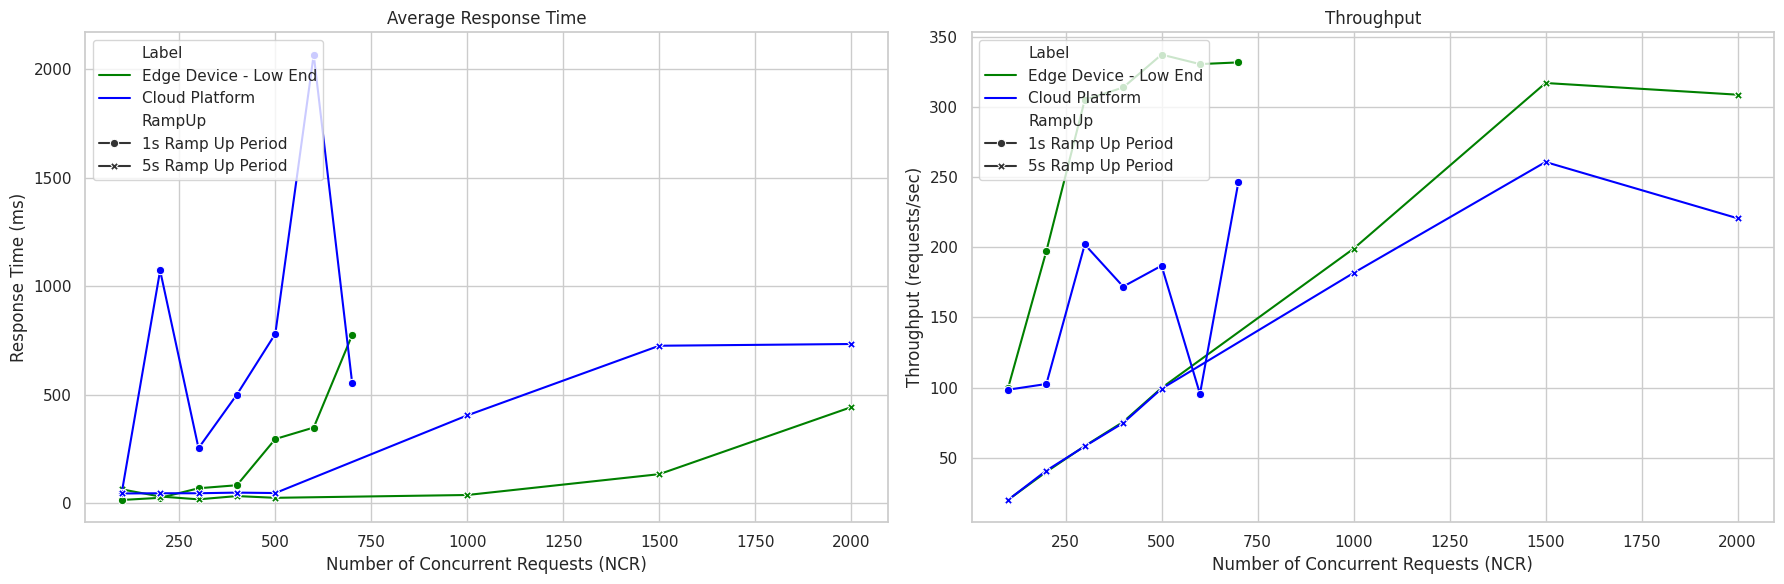

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data for 1-second ramp-up period
ncr_values_1s = [100, 200, 300, 400, 500, 600, 700]
data_1s = []

for ncr in ncr_values_1s:
    filename = f'Simultaneous_1sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '1s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_1s.append(df)

# Load the data for 5-second ramp-up period
ncr_values_5s = [100, 200, 300, 400, 500, 1000, 1500, 2000]
data_5s = []

for ncr in ncr_values_5s:
    filename = f'Simultaneous_5sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '5s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_5s.append(df)

# Concatenate all dataframes into a single dataframe
df_1s = pd.concat(data_1s, ignore_index=True)
df_5s = pd.concat(data_5s, ignore_index=True)
df = pd.concat([df_1s, df_5s], ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names
df['Label'] = df['Label'].replace({
    'Azure Web Service': 'Cloud Platform',
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End'
})

# Set the plotting style
sns.set(style="whitegrid")

# Define custom color and style palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "green"}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Average Response Time
sns.lineplot(x='NCR', y='Average', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[0])
axes[0].set_title('Average Response Time')
axes[0].set_ylabel('Response Time (ms)')
axes[0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0].legend(loc='upper left')

# Plot Throughput
sns.lineplot(x='NCR', y='Throughput', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[1])
axes[1].set_title('Throughput')
axes[1].set_ylabel('Throughput (requests/sec)')
axes[1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('CloudVsEdgeSimul.png', format='png')

FileNotFoundError: [Errno 2] No such file or directory: 'Simultaneous_1sRUP_Alienware/100NCR.csv'

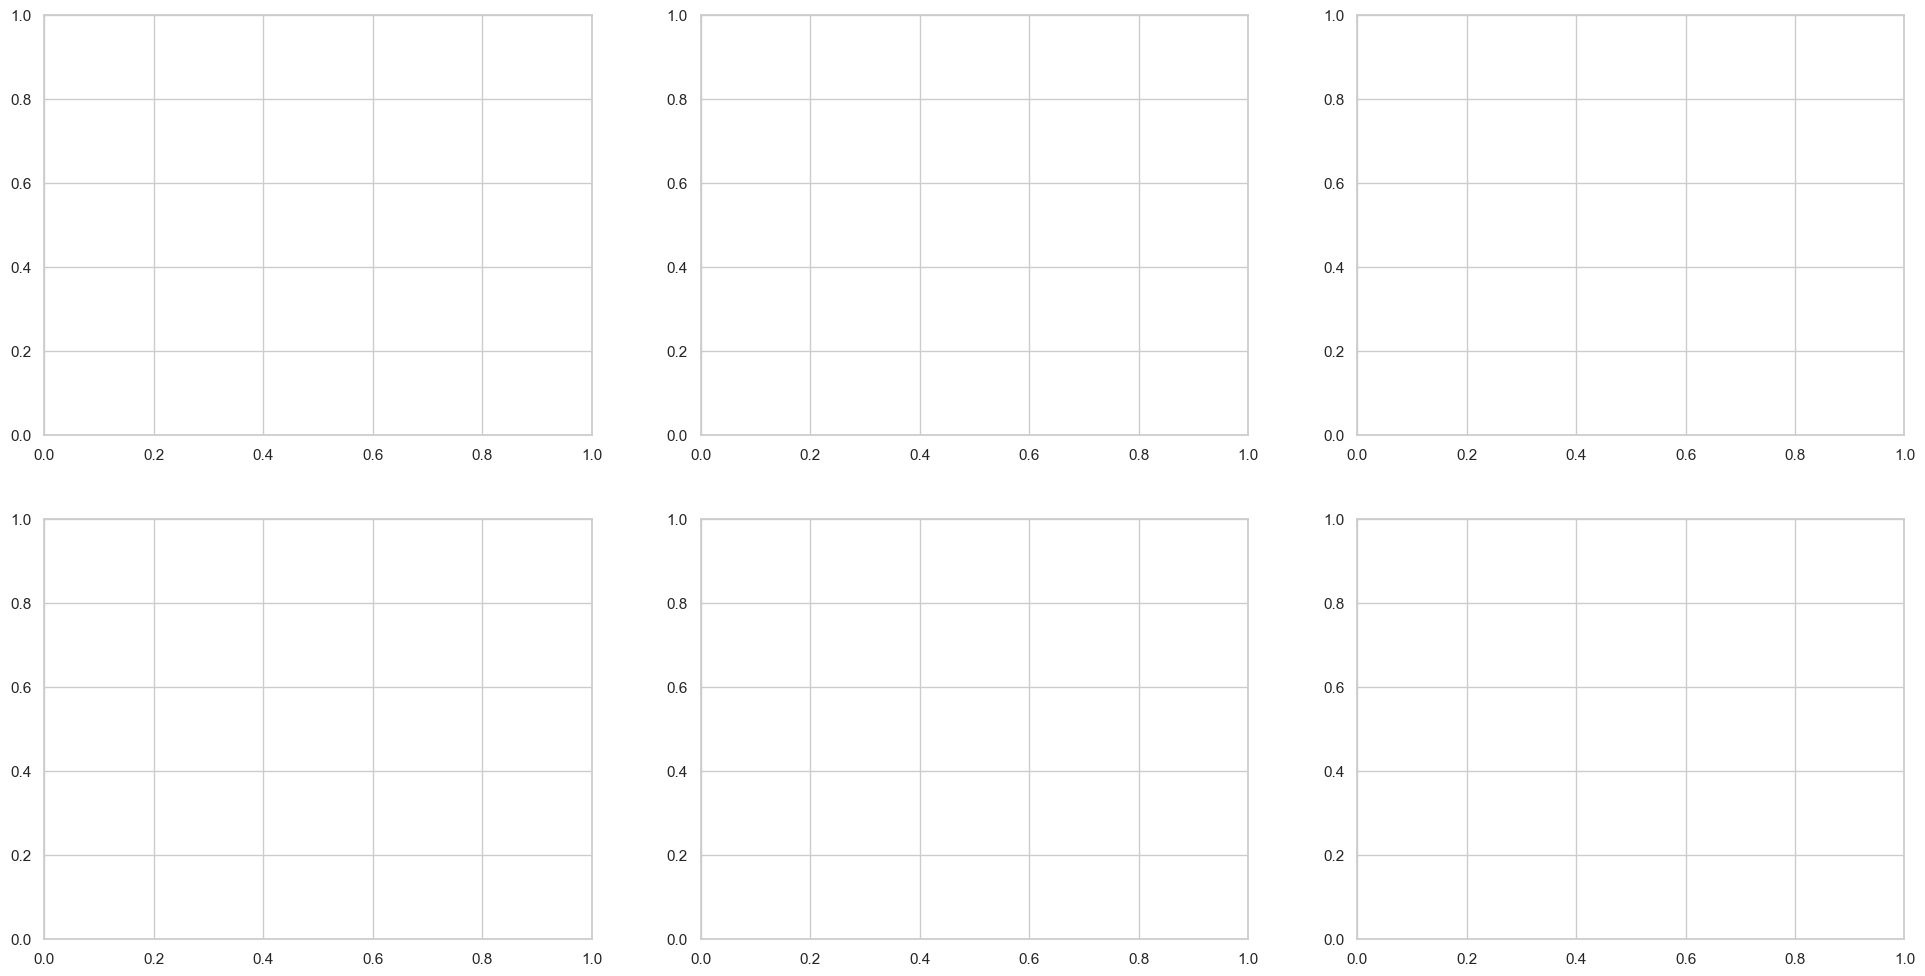

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set the plotting style
sns.set(style="whitegrid")

# Define the figure and axes for a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Test 1: Simultaneous 1sRUP Alienware vs. Edge Device (High End vs. Low End)
ncr_values = [100, 200, 300, 400, 500, 600, 700]
data = []

for ncr in ncr_values:
    filename = f'Simultaneous_1sRUP_Alienware/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    data.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names
df['Label'] = df['Label'].replace({
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End',
    'Edge Device - Alienware Laptop': 'Edge Device - High End'
})

# Define custom color palette
palette = {"Edge Device - High End": "green", "Edge Device - Low End": "blue"}

# Plot Average Response Time (Test 1)
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Average Response Time (Test 1)')
axes[0, 0].set_ylabel('Response Time (ms)')
axes[0, 0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 0].legend(loc='upper left', title='')

# Plot Throughput (Test 1)
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Throughput (Test 1)')
axes[0, 1].set_ylabel('Throughput (requests/sec)')
axes[0, 1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 1].legend(loc='upper left', title='')

# Test 2: Isolated 1sRUP Azure vs. Edge Devices (High End vs. Low End)
directory = 'Isolated_1sRUP/'  # Adjust this path as necessary
ncr_values = [100, 200, 300, 500, 700, 1000]
data = []

for ncr in ncr_values:
    azure_filename = os.path.join(directory, f'Azure{ncr}NCR.csv')
    edge_asus_filename = os.path.join(directory, f'Edge{ncr}NCR.csv')
    edge_alienware_filename = os.path.join(directory, f'Alienware{ncr}NCR.csv')

    # Load Azure data
    azure_df = pd.read_csv(azure_filename)
    azure_df['NCR'] = ncr  # Add a column to indicate the NCR value
    azure_df['Label'] = 'Cloud Platform'  # Add a column to indicate the source
    data.append(azure_df)

    # Load Edge data (Asus ROG Laptop)
    edge_asus_df = pd.read_csv(edge_asus_filename)
    edge_asus_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_asus_df['Label'] = 'Edge Device - Low End'  # Add a column to indicate the source
    data.append(edge_asus_df)

    # Load Edge data (Alienware Laptop)
    edge_alienware_df = pd.read_csv(edge_alienware_filename)
    edge_alienware_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_alienware_df['Label'] = 'Edge Device - High End'  # Add a column to indicate the source
    data.append(edge_alienware_df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Define custom color palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "orange", "Edge Device - High End": "green"}

# Plot Average Response Time (Test 2)
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0, 2])
axes[0, 2].set_title('Average Response Time (Test 2)')
axes[0, 2].set_ylabel('Response Time (ms)')
axes[0, 2].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 2].legend(loc='upper left')

# Plot Throughput (Test 2)
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('Throughput (Test 2)')
axes[1, 0].set_ylabel('Throughput (requests/sec)')
axes[1, 0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 0].legend(loc='upper left')

# Test 3: Cloud vs. Edge (1s vs. 5s Ramp-Up Period)
ncr_values_1s = [100, 200, 300, 400, 500, 600, 700]
data_1s = []

for ncr in ncr_values_1s:
    filename = f'Simultaneous_1sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '1s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_1s.append(df)

# Load the data for 5-second ramp-up period
ncr_values_5s = [100, 200, 300, 400, 500, 1000, 1500, 2000]
data_5s = []

for ncr in ncr_values_5s:
    filename = f'Simultaneous_5sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '5s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_5s.append(df)

# Concatenate all dataframes into a single dataframe
df_1s = pd.concat(data_1s, ignore_index=True)
df_5s = pd.concat(data_5s, ignore_index=True)
df = pd.concat([df_1s, df_5s], ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names
df['Label'] = df['Label'].replace({
    'Azure Web Service': 'Cloud Platform',
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End'
})

# Define custom color and style palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "green"}

# Plot Average Response Time (Test 3)
sns.lineplot(x='NCR', y='Average', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('Average Response Time (Test 3)')
axes[1, 1].set_ylabel('Response Time (ms)')
axes[1, 1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 1].legend(loc='upper left')

# Plot Throughput (Test 3)
sns.lineplot(x='NCR', y='Throughput', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[1, 2])
axes[1, 2].set_title('Throughput (Test 3)')
axes[1, 2].set_ylabel('Throughput (requests/sec)')
axes[1, 2].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 2].legend(loc='upper left')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('AllTestsCombined.png', format='png')


FileNotFoundError: [Errno 2] No such file or directory: 'Simultaneous_1sRUP_Alienware/100NCR.csv'

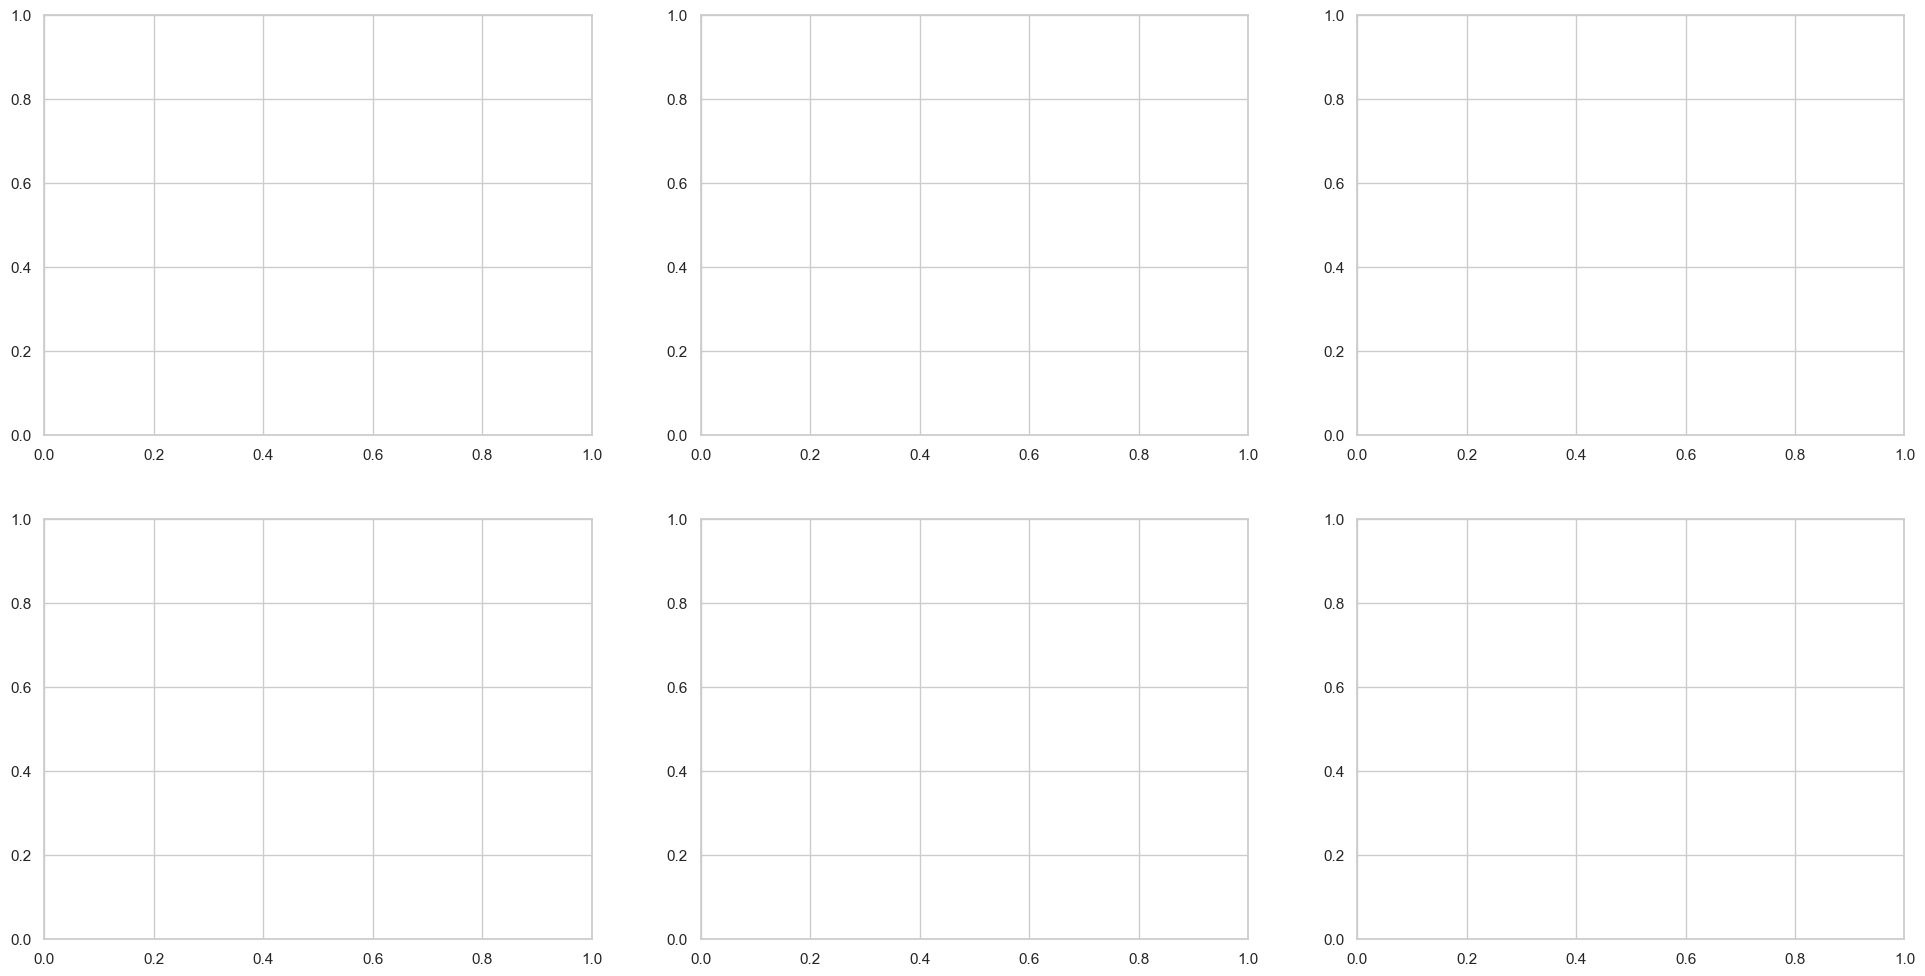

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Define the figure and axes for a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Test 1: Simultaneous 1sRUP Alienware vs. Edge Device (High End vs. Low End)
ncr_values = [100, 200, 300, 400, 500, 600, 700]
data = []

for ncr in ncr_values:
    filename = f'Simultaneous_1sRUP_Alienware/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    data.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names
df['Label'] = df['Label'].replace({
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End',
    'Edge Device - Alienware Laptop': 'Edge Device - High End'
})

# Define custom color palette
palette = {"Edge Device - High End": "green", "Edge Device - Low End": "blue"}

# Plot Average Response Time (Test 1)
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Test 1: High End vs Low End - Average Response Time')
axes[0, 0].set_ylabel('Response Time (ms)')
axes[0, 0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 0].legend(loc='upper left', title='')

# Plot Throughput (Test 1)
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('Test 1: High End vs Low End - Throughput')
axes[1, 0].set_ylabel('Throughput (requests/sec)')
axes[1, 0].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 0].legend(loc='upper left', title='')

# Test 2: Isolated 1sRUP Azure vs. Edge Devices (High End vs. Low End)
directory = 'Isolated_1sRUP/'  # Adjust this path as necessary
ncr_values = [100, 200, 300, 500, 700, 1000]
data = []

for ncr in ncr_values:
    azure_filename = os.path.join(directory, f'Azure{ncr}NCR.csv')
    edge_asus_filename = os.path.join(directory, f'Edge{ncr}NCR.csv')
    edge_alienware_filename = os.path.join(directory, f'Alienware{ncr}NCR.csv')

    # Load Azure data
    azure_df = pd.read_csv(azure_filename)
    azure_df['NCR'] = ncr  # Add a column to indicate the NCR value
    azure_df['Label'] = 'Cloud Platform'  # Add a column to indicate the source
    data.append(azure_df)

    # Load Edge data (Asus ROG Laptop)
    edge_asus_df = pd.read_csv(edge_asus_filename)
    edge_asus_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_asus_df['Label'] = 'Edge Device - Low End'  # Add a column to indicate the source
    data.append(edge_asus_df)

    # Load Edge data (Alienware Laptop)
    edge_alienware_df = pd.read_csv(edge_alienware_filename)
    edge_alienware_df['NCR'] = ncr  # Add a column to indicate the NCR value
    edge_alienware_df['Label'] = 'Edge Device - High End'  # Add a column to indicate the source
    data.append(edge_alienware_df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(data, ignore_index=True)

# Define custom color palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "orange", "Edge Device - High End": "green"}

# Plot Average Response Time (Test 2)
sns.lineplot(x='NCR', y='Average', hue='Label', data=df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Test 2: Isolated Test - Cloud vs Edge Devices - Average Response Time')
axes[0, 1].set_ylabel('Response Time (ms)')
axes[0, 1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 1].legend(loc='upper left')

# Plot Throughput (Test 2)
sns.lineplot(x='NCR', y='Throughput', hue='Label', data=df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('Test 2: Isolated Test - Cloud vs Edge Devices - Throughput')
axes[1, 1].set_ylabel('Throughput (requests/sec)')
axes[1, 1].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 1].legend(loc='upper left')

# Test 3: Cloud vs. Edge (1s vs. 5s Ramp-Up Period)
ncr_values_1s = [100, 200, 300, 400, 500, 600, 700]
data_1s = []

for ncr in ncr_values_1s:
    filename = f'Simultaneous_1sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '1s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_1s.append(df)

# Load the data for 5-second ramp-up period
ncr_values_5s = [100, 200, 300, 400, 500, 1000, 1500, 2000]
data_5s = []

for ncr in ncr_values_5s:
    filename = f'Simultaneous_5sRUP/{ncr}NCR.csv'  # Adjust the path as necessary
    df = pd.read_csv(filename)
    df['NCR'] = ncr  # Add a column to indicate the NCR value
    df['RampUp'] = '5s Ramp Up Period'  # Add a column to indicate the ramp-up period
    data_5s.append(df)

# Concatenate all dataframes into a single dataframe
df_1s = pd.concat(data_1s, ignore_index=True)
df_5s = pd.concat(data_5s, ignore_index=True)
df = pd.concat([df_1s, df_5s], ignore_index=True)

# Filter out the "TOTAL" attribute
df = df[df['Label'] != 'TOTAL']

# Replace legend names
df['Label'] = df['Label'].replace({
    'Azure Web Service': 'Cloud Platform',
    'Edge Device - Asus ROG Laptop': 'Edge Device - Low End'
})

# Define custom color and style palette
palette = {"Cloud Platform": "blue", "Edge Device - Low End": "green"}

# Plot Average Response Time (Test 3)
sns.lineplot(x='NCR', y='Average', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[0, 2])
axes[0, 2].set_title('Test 3: Ramp-Up Period Comparison - Average Response Time')
axes[0, 2].set_ylabel('Response Time (ms)')
axes[0, 2].set_xlabel('Number of Concurrent Requests (NCR)')
axes[0, 2].legend(loc='upper left')

# Plot Throughput (Test 3)
sns.lineplot(x='NCR', y='Throughput', hue='Label', style='RampUp', data=df, markers=True, dashes=False, palette=palette, ax=axes[1, 2])
axes[1, 2].set_title('Test 3: Ramp-Up Period Comparison - Throughput')
axes[1, 2].set_ylabel('Throughput (requests/sec)')
axes[1, 2].set_xlabel('Number of Concurrent Requests (NCR)')
axes[1, 2].legend(loc='upper left')

# Adjust the layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3)
plt.show()

# Save the figure
fig.savefig('AllTestsCombined_Annotated.png', format='png')
